In [448]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize as fit

In [449]:
# Loading datafile

d = {'Name': ['Proxima Cen b', 'Ross 128 b', 'GJ 1061 c', 'GJ 1061 d', 'GJ 273 b', 'Teegardens Star b', 'Teegardens Star c', 'GJ 1002 b', 'GJ1002 c', 'GJ 667 C e', 'GJ 667 C f'], 'Mass (kg x 10^24)': [1.07, 1.40, 1.74, 1.64, 2.89, 1.16, 1.05, 1.08, 1.36, 2.70, 2.70], 'Radius (m x 10^6)': [1.03, 1.11, 1.18, 1.16, 1.51, 1.05, 1.02, 1.03, 1.10, 1.45, 1.45], 'Period (days)': [11.2, 9.87, 6.69, 13.0, 18.6, 4.91, 11.4, 10.3, 21.2, 62.2, 39.0], 'Distance (m x 10^15)': [4.2,11.0,12.0,12.0,12.3,12.5,12.5,15.8,15.8,23.6,23.6]}
df = pd.DataFrame(data=d)
me = 5.972*10**24
ly = 9.461*10**15
df

,Name,Mass (kg x 10^24),Radius (m x 10^6),Period (days),Distance (m x 10^15)
0,Proxima Cen b,1.07,1.03,11.20,4.2
1,Ross 128 b,1.40,1.11,9.87,11.0
2,GJ 1061 c,1.74,1.18,6.69,12.0
3,GJ 1061 d,1.64,1.16,13.00,12.0
4,GJ 273 b,2.89,1.51,18.60,12.3
5,Teegardens Star b,1.16,1.05,4.91,12.5
6,Teegardens Star c,1.05,1.02,11.40,12.5
7,GJ 1002 b,1.08,1.03,10.30,15.8
8,GJ1002 c,1.36,1.10,21.20,15.8
9,GJ 667 C e,2.70,1.45,62.20,23.6


In [450]:
# Converting Mass and radius from ME (Earth masses) and RE (Earth radiuses) to kilograms and meters respectively
# Also converting distance from light years to meters

df['Mass (kg x 10^24)'] = df['Mass (kg x 10^24)']*5.972
df['Radius (m x 10^6)'] = df['Radius (m x 10^6)']*6.371
df['Distance (m x 10^15)'] = df['Distance (m x 10^15)']*9.461
df

,Name,Mass (kg x 10^24),Radius (m x 10^6),Period (days),Distance (m x 10^15)
0,Proxima Cen b,6.39004,6.56213,11.20,39.7362
1,Ross 128 b,8.36080,7.07181,9.87,104.0710
2,GJ 1061 c,10.39128,7.51778,6.69,113.5320
3,GJ 1061 d,9.79408,7.39036,13.00,113.5320
4,GJ 273 b,17.25908,9.62021,18.60,116.3703
5,Teegardens Star b,6.92752,6.68955,4.91,118.2625
6,Teegardens Star c,6.27060,6.49842,11.40,118.2625
7,GJ 1002 b,6.44976,6.56213,10.30,149.4838
8,GJ1002 c,8.12192,7.00810,21.20,149.4838
9,GJ 667 C e,16.12440,9.23795,62.20,223.2796


In [466]:
# Gravity equation

m = df['Mass (kg x 10^24)']*(10**24)
r = df['Distance (m x 10^15)']*(10**15)

def grav(r, G):
    return (G*m_mod*me)/(r**2)

def grav2(r, G):
        return (G*m*me)/(r**2)


f = grav(r_mod, G)
f2 = grav2(r, G)
f_guess = [1500000, 296000, 313000, 324000, 515000, 198000, 181000, 114000, 146000, 129000, 128000]


# display(f)

In [496]:
r_mod = np.linspace(np.min(r), np.max(r), 100)
f_mod = np.linspace(np.max(f), np.min(f), 100)
m_mod = np.linspace(np.min(m), np.max(m), 100)
f_guess_mod = np.linspace(np.max(f_guess), np.min(f_guess), 100)

In [458]:
df.insert(5, 'Force (N)', grav2(r, G), True)
df.insert(6, 'Guess Force (N)', f_guess, True)

In [459]:
df

,Name,Mass (kg x 10^24),Radius (m x 10^6),Period (days),Distance (m x 10^15),Force (N),Guess Force (N)
0,Proxima Cen b,6.39004,6.56213,11.20,39.7362,1525627.09316,1500000
1,Ross 128 b,8.36080,7.07181,9.87,104.0710,291008.625108,296000
2,GJ 1061 c,10.39128,7.51778,6.69,113.5320,303913.471876,313000
3,GJ 1061 d,9.79408,7.39036,13.00,113.5320,286447.180389,324000
4,GJ 273 b,17.25908,9.62021,18.60,116.3703,480452.896112,515000
5,Teegardens Star b,6.92752,6.68955,4.91,118.2625,186724.43712,198000
6,Teegardens Star c,6.27060,6.49842,11.40,118.2625,169017.809462,181000
7,GJ 1002 b,6.44976,6.56213,10.30,149.4838,108810.993914,114000
8,GJ1002 c,8.12192,7.00810,21.20,149.4838,137021.251596,146000
9,GJ 667 C e,16.12440,9.23795,62.20,223.2796,121927.860711,129000


<ErrorbarContainer object of 3 artists>

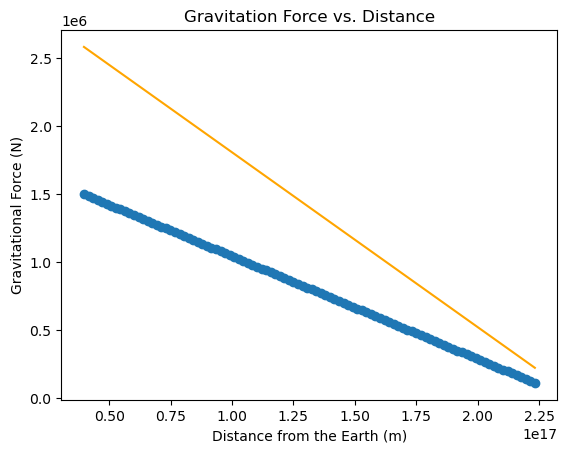

In [501]:
plt.xlabel('Distance from the Earth (m)')
plt.ylabel('Gravitational Force (N)')
plt.title('Gravitation Force vs. Distance')

plt.scatter(r_mod, f_guess_mod)
plt.errorbar(r_mod, f_mod, color = 'orange', xerr = True, yerr = True)

# plt.plot(r, f)

In [499]:
# Deriving Gravitational Constant 'G' and its error, this will test the accuracy of my model

pars, cov = fit.curve_fit(grav, r_mod, f_guess_mod)
err = np.sqrt(np.diag(cov))

# pars, cov = fit.curve_fit(grav2, r, f_guess)
# err = np.sqrt(np.diag(cov))

G = pars
G_err = err

print(pars)
print(err)
print('G = 6.31e-11 +/- 7.21e-13')

[1.08832277e-10]
[4.16969727e-12]
G = 6.31e-11 +/- 7.21e-13


In [473]:
# Gravitation force between the sun and the Earth

des = 1.5073*(10**11) # Distance between the Earth and the Sun
ms = 1.9891*(10**30) # mass of the Sun

display((G*ms*me)/(des**2))
print('the actual value for the gravitational force between the sun and the Earth is 3.54 x 10^22 which is close to the value shown above.')

array([3.30046173e+22])

the actual value for the gravitational force between the sun and the Earth is 3.54 x 10^22 which is close to the value shown above.


Text(0.5, 1.0, 'Gravitation Force vs. Distance (Residuals)')

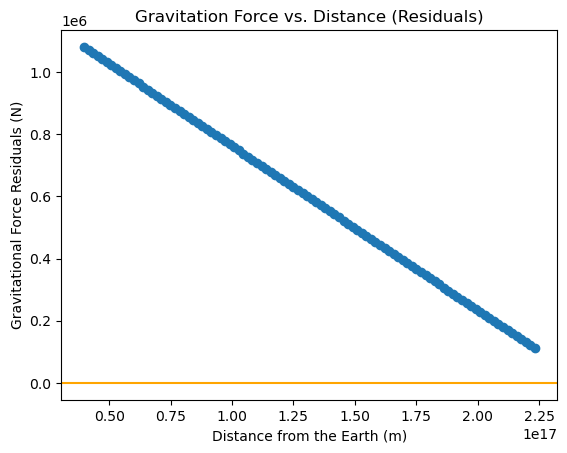

In [474]:
# Residuals

plt.scatter(r_mod, f_mod - f_guess_mod)
plt.axhline(y = 0, color = 'orange')
plt.xlabel('Distance from the Earth (m)')
plt.ylabel('Gravitational Force Residuals (N)')
plt.title('Gravitation Force vs. Distance (Residuals)')

In [475]:
# Chi-sq

chisq = np.sum((f_guess_mod-f_mod)**2)

rchisq = chisq/100

print('Reduce Chi-Squared: ', rchisq)

Reduce Chi-Squared:  435328908782.5982
